In [45]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 0.1.3

### Theoretical solution:

In [42]:
14*13


182

In [44]:
1 / (13 * 14 * 182) * sum([(y-1) * (15-y)**2 for y in range(1, 16)])

0.09615384615384615

### Monte Carlo simulation:

In [39]:
N = 10
successes = 0
choices = np.arange(1, 16)

for _ in range(N):
    yesterday = np.random.choice(choices, size=3, replace=False)
    today = np.random.choice(choices, size=3, replace=False)
    yesterday.sort()
    today.sort()
    print(yesterday, today)
    successes += (yesterday[:2] == today[:2]).all()

print(successes, N, successes / N)

[ 2  5 11] [ 7 10 14]
[ 8  9 13] [12 13 14]
[ 5  9 15] [ 1 10 13]
[ 8 10 14] [ 7  9 14]
[ 1  2 10] [1 2 6]
[ 9 11 13] [ 1  3 10]
[12 14 15] [ 4  5 10]
[2 4 6] [ 3  7 13]
[ 9 12 14] [ 1  8 14]
[ 4  7 11] [ 4  8 13]
1 10 0.1


In [41]:
N = 100_000
successes = 0
choices = np.arange(1, 16)

for _ in range(N):
    yesterday = np.random.choice(choices, size=3, replace=False)
    today = np.random.choice(choices, size=3, replace=False)
    yesterday.sort()
    today.sort()
    successes += (yesterday[:2] == today[:2]).all()

print(successes, N, successes / N)

1435 100000 0.01435


## Problem 0.3

In [95]:
def simulate_k(trials, n, k, plot=True):
    p = [0] * n

    for _ in range(trials):
        offers = np.arange(1, 51)
        np.random.shuffle(offers)
        x0 = offers[:k].min()

        for i in range(k, n):
            if offers[i] < x0: # find first offer better than x0
                p[offers[i]-1] += 1 / trials
                break
            elif i == n - 1: # if reach last offer, choose it
                p[offers[i]-1] += 1 / trials
    
    if plot:
        plt.bar(np.arange(1, n+1), p)
        plt.xlabel('Rank of selected offer')
        plt.ylabel('Frequency selected')
        plt.title('Simulated offer selection')
    
    return p

def simulate(trials, n, k_range):
    p_best_per_k = [0] * (n - 1)

    for k in k_range:
        p = simulate_k(trials, n, k, plot=False)
        p_best_per_k[k-1] = p[0]
    
    plt.bar(np.arange(1, n), p_best_per_k)
    plt.xlabel('K')
    plt.ylabel('Frequency selected')
    plt.title('Best offer selection vs. K')

### Problem 0.3.1

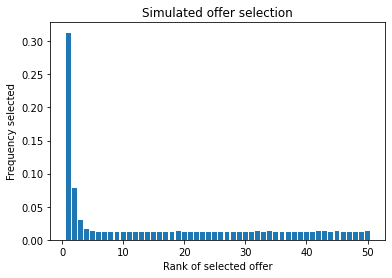

In [94]:
simulate_k(100_000, 50, 30);

### Problem 0.3.2

In [96]:
simulate(100_000, 50, range(1, 49))